## (Before using the code, read the technical note attached to this repository to see in detail the formulas and values used for this plot!)

## Required libraries for the plot

In [1]:
import numpy
import pylab
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import cmath
import random
from IPython import display

## Parameters and mass equations used

The parameters and fixed values are listed here separated in NH and IH parameters, same situation for the mass equations (equation 10 at the technical note), for the NH all the mass equations are in terms of $m_1$ and for the IH, in terms of $m_3$, here are not only listed the best fit values, there are also listed the +3/-3 $\sigma$ values for all the masses to get not only the best fit value plot, but also including the uncertainties for the plot.

Note that we are including $s_{14}$ and $\Delta m^2_{41}$ as $\Delta m^2_{\text{LSND}}$ to add $m_{light}$ dependence to $m_{4}$

In [2]:
#Normal hierarchy parameters (Best Fit)

NHs12=0.307
NHs13=0.022
NHc12=0.693
NHc13=0.978
NHs14=0.023
NHc14=0.977

solarmass=0.0000753
atmmass=0.0025283
LSNDmass=1.78

#solarmass=del_m21^2
#atmmass=del_m31^2

#Normal hierarchy parameters (3 sigma)

maxNHs12=0.346
minNHs12=0.268

maxNHs13=0.0241
minNHs13=0.0199

maxNHc12=0.732
minNHc12=0.654

maxNHc13=0.9801
minNHc13=0.9759

maxNHs14=0.04
minNHs14=0.006

maxNHc14=0.96
minNHc14=0.994

maxsolarmass=0.0000807
minsolarmass=0.0000699

maxatmmass=0.0025631
minatmmass=0.0024935

maxLSNDmass=2.01
minLSNDmass=1.61

NHm1=numpy.linspace(0.0001,0.001,2000) 
NHm1=numpy.append(NHm1, numpy.linspace(0.001,0.01,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.01,0.1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.1,1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(1,10,2000))

maxNHm2=(NHm1**2+maxsolarmass)**(1/2)
NHm2=(NHm1**2+solarmass)**(1/2)
minNHm2=(NHm1**2+minsolarmass)**(1/2)

maxNHm3=(NHm1**2+maxatmmass)**(1/2)
NHm3=(NHm1**2+atmmass)**(1/2)
minNHm3=(NHm1**2+minatmmass)**(1/2)

maxNHm4=(NHm1**2+maxLSNDmass)**(1/2)
NHm4=(NHm1**2+LSNDmass)**(1/2)
minNHm4=(NHm1**2+minLSNDmass)**(1/2)

In [3]:
#Inverted Hierarchy parameters (Best Fit)

IHs12=0.307
IHs13=0.022
IHc12=0.693
IHc13=0.978
IHs14=0.023
IHc14=0.977

Isolarmass=0.0000753
Iatmmass=0.002536
ILSNDmass=1.78

#Inverted Hierarchy parameters (3 sigma)

maxIHs12=0.346
minIHs12=0.268

maxIHs13=0.0241
minIHs13=0.0199

maxIHc12=0.732
minIHc12=0.654

maxIHc13=0.9801
minIHc13=0.9759

maxIHs14=0.04
minIHs14=0.006

maxIHc14=0.96
minIHc14=0.994

maxIsolarmass=0.0000807
minIsolarmass=0.0000699

maxIatmmass=0.002638
minIatmmass=0.002434

maxILSNDmass=2.01
minILSNDmass=1.61

IHm3=numpy.linspace(0.0001,0.001,2000) 
IHm3=numpy.append(IHm3, numpy.linspace(0.001,0.01,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.01,0.1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.1,1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(1,10,2000))

maxIHm2=(IHm3**2+maxIsolarmass+maxIatmmass)**(1/2)
IHm2=(IHm3**2+Isolarmass+Iatmmass)**(1/2)
minIHm2=(IHm3**2+minIsolarmass+minIatmmass)**(1/2)

maxIHm1=(IHm3**2+maxIatmmass)**(1/2)
IHm1=(IHm3**2+Iatmmass)**(1/2)
minIHm1=(IHm3**2+minIatmmass)**(1/2)

maxIHm4=(IHm3**2+maxILSNDmass+maxIatmmass)**(1/2)
IHm4=(IHm3**2+ILSNDmass+Iatmmass)**(1/2)
minIHm4=(IHm3**2+minILSNDmass+minIatmmass)**(1/2)

#solarmass=del_m21^2
#atmmass=del_m31^2

## Lobster plot 3 neutrinos for comparison purposes

This cell generates a plot for 3 neutrinos to compare it with the plots of 1+3 neutrinos.

In [4]:
NHm111=numpy.linspace(0.0001,0.001,2000) 
NHm111=numpy.append(NHm111, numpy.linspace(0.001,0.01,2000))
NHm111=numpy.append(NHm111, numpy.linspace(0.01,0.1,2000))
NHm111=numpy.append(NHm111, numpy.linspace(0.1,1,2000))
NHm111=numpy.append(NHm111, numpy.linspace(1,10,2000))

maxNHm222=(NHm111**2+maxsolarmass)**(1/2)
NHm222=(NHm111**2+solarmass)**(1/2)
minNHm222=(NHm111**2+minsolarmass)**(1/2)

maxNHm333=(NHm111**2+maxatmmass)**(1/2)
NHm333=(NHm111**2+atmmass)**(1/2)
minNHm333=(NHm111**2+minatmmass)**(1/2)


IHm333=numpy.linspace(0.0001,0.001,2000) 
IHm333=numpy.append(IHm333, numpy.linspace(0.001,0.01,2000))
IHm333=numpy.append(IHm333, numpy.linspace(0.01,0.1,2000))
IHm333=numpy.append(IHm333, numpy.linspace(0.1,1,2000))
IHm333=numpy.append(IHm333, numpy.linspace(1,10,2000))

maxIHm222=(IHm333**2+maxIsolarmass+maxIatmmass)**(1/2)
IHm222=(IHm333**2+Isolarmass+Iatmmass)**(1/2)
minIHm222=(IHm333**2+minIsolarmass+minIatmmass)**(1/2)

maxIHm111=(IHm333**2+maxIatmmass)**(1/2)
IHm111=(IHm333**2+Iatmmass)**(1/2)
minIHm111=(IHm333**2+minIatmmass)**(1/2)

## Neutrino animation

To make this animation, it was required to put a "time dependence" on the parameter we are interested to change with time, and that parameter in this case is $\theta_{14}$ (or in this case, $s^2_{14}$), that parameter will change depending on which frame the animation is located, and also, another important thing to preserve are the boundaries that contain all possible angle combination and the smoothness of each frame transition, to locate each boundaries it was required the use of a boundary generator, that generator was able to calculate and locate all the boundaries for specific frames that contained all angles and presserved consistency and smoothness, the boundaries for this SNH case are: 

($\phi_{12}$, $\phi_{13}$, $\phi_{14}$) in terms of $\pi$

upper boundary= (0,0,0)\
right lower boundary= (1,1,1)\
left lower boundary: for 4>=frame>=0 (1,0,0)--
                     for 8>=frame>=5 (0,1,1)--
                     for 12>=frame>=9 (1,1,0)--
                     for frame>=13 (0,0,1)
                     
For the SIH even thought that using the boundary generator could give exact boundaries, for this animation the boundaries are always (0,0,0) for upper boundary and (1,1,1), lower boundary, it is not necessary to calculate left lower boundary because (at least for a min value of 0.0001) it covers all left part.

Details of how the parameters change, the formulas used and the boundary generator are located on the technical note pg 25-27 section 13.

<IPython.core.display.Javascript object>


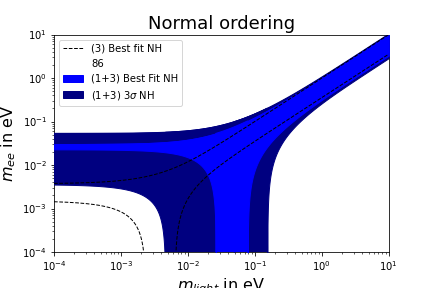

In [5]:
fig=plt.figure()

def animate(frame): 
    
    NHs14=0.023*(frame/99)
    NHc14=1-NHs14
    
    maxNHs14=0.04*(frame/99)
    maxNHc14=1-maxNHs14
    
    minNHs14=0.006*(frame/99)
    minNHc14=1-minNHs14
    
    NHmee11=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,0)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,0)) + 
                  NHs14*NHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

    NHmee12=abs(NHc12*NHc13*NHc14*NHm1 + 
                      NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,numpy.pi)) + 
                      NHs13*NHm3*NHc14*cmath.exp(complex(0,numpy.pi)) + 
                      NHs14*NHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 1,1,1 (in terms of pi)
    
    if (frame>=0 and frame<=4):
        NHmee13=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,numpy.pi)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,0)) + 
                  NHs14*NHm4*cmath.exp(complex(0,0))) #All masses different, 1,0,0 (in terms of pi)
    
    if (frame>=5 and frame<=8):
        NHmee13=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,0)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,numpy.pi)) + 
                  NHs14*NHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,1,1 (in terms of pi)
                    
    if (frame>=9 and frame<=12):
        NHmee13=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,numpy.pi)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,numpy.pi)) + 
                  NHs14*NHm4*cmath.exp(complex(0,0))) #All masses different, 1,1,0 (in terms of pi)
    
    if (frame>=13):
        NHmee13=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,0)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,0)) + 
                  NHs14*NHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,1 (in terms of pi)
    
    
    maxNHmee11=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,0)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,0)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

    maxNHmee12=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,numpy.pi)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,0)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,1 (in terms of pi)
    
    if (frame>=0 and frame<=4):
        maxNHmee13=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,numpy.pi)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,0)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,0))) #All masses different, 1,0,0 (in terms of pi)
    
    if (frame>=5 and frame<=8):
        maxNHmee13=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,0)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,numpy.pi)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,1,1 (in terms of pi)
        
    if (frame>=9 and frame<=12):
        maxNHmee13=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,numpy.pi)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,numpy.pi)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,0))) #All masses different, 1,1,0 (in terms of pi)
        
    if (frame>=13):
        maxNHmee13=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,0)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,0)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,1 (in terms of pi)
    
    if (frame>=0 and frame<=4):
        minNHmee13=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,numpy.pi)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,0)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,0))) #All masses different, 1,0,0 (in terms of pi)
    
    if (frame>=5 and frame<=8):
        minNHmee13=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,0)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,numpy.pi)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,1,1 (in terms of pi)
    
    if (frame>=9 and frame<=12):
        minNHmee13=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,numpy.pi)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,numpy.pi)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,0))) #All masses different, 1,1,0 (in terms of pi)
        
    if (frame>=13):
        minNHmee13=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,0)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,0)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,1 (in terms of pi)
                    
    
    plt.cla()
    
    NHmee1=abs(NHc12*NHc13*NHm111 - NHs12*NHc13*NHm222 + NHs13*NHm333)                           
    NHmee2=abs(NHc12*NHc13*NHm111 + NHs12*NHc13*NHm222 + NHs13*NHm333)
    NHmee3=abs(NHc12*NHc13*NHm111 - NHs12*NHc13*NHm222 - NHs13*NHm333)

    NHm1filt1=NHm111[NHm111<0.0024]
    NHm1filt3=NHm111[NHm111>0.0065]
    NHmee1filt1=NHmee1[NHm111<0.0024]
    NHmee3filt3=NHmee3[NHm111>0.0065]
    
    pylab.plot(NHm1filt1,NHmee1filt1,color="black",label="(3) Best fit NH", linestyle="--",linewidth=1, alpha=1,zorder=20)
    pylab.plot(NHm1,NHmee2,color="black",linestyle="--",linewidth=1, alpha=1,zorder=20)
    pylab.plot(NHm1filt3,NHmee3filt3,color="black",linestyle="--",linewidth=1, alpha=1,zorder=20)
                    
    #pylab.plot(NHm1, NHmee11, color="black", linestyle="--", linewidth=1, alpha=1,zorder=16)
    #pylab.plot(NHm1, NHmee12, color="blue", linestyle="--", linewidth=1, alpha=1,zorder=16)
    #pylab.plot(NHm1, NHmee13, color="red", linestyle="--", linewidth=1, alpha=1,zorder=16)
    
    #pylab.plot(NHm1, maxNHmee11, color="black", linestyle="-", linewidth=1, alpha=1,zorder=16)
    #pylab.plot(NHm1, maxNHmee12, color="blue", linestyle="-", linewidth=1, alpha=1,zorder=16)
    #pylab.plot(NHm1, maxNHmee13, color="red", linestyle="-", linewidth=1, alpha=1,zorder=16)
    
    #pylab.plot(NHm1, minNHmee13, color="red", linestyle="-.", linewidth=1, alpha=1,zorder=16)
    
    pylab.plot(0, 0, color="white",label=frame)
    
    plt.fill_between(NHm1, NHmee11, NHmee12, color="blue",label="(1+3) Best Fit NH",alpha=1,zorder=14)
    plt.fill_between(NHm1, NHmee11, NHmee13, color="blue",alpha=1,zorder=14)  
    plt.fill_between(NHm1, NHmee11, 0, where=(NHm1>NHm1[numpy.argmin(NHmee13)])&(NHm1<NHm1[numpy.argmin(NHmee12)]) ,color="blue",alpha=1,zorder=14)
    
    plt.fill_between(NHm1, maxNHmee11, maxNHmee12, color="navy",label="(1+3) 3$\sigma$ NH",alpha=1,zorder=13)
    plt.fill_between(NHm1, maxNHmee11, maxNHmee13, color="navy",alpha=1,zorder=13)
    
    plt.fill_between(NHm1, maxNHmee11, minNHmee13, color="navy",alpha=1,zorder=13)
    
    plt.fill_between(NHm1, maxNHmee11, 0, where=(NHm1>NHm1[numpy.argmin(minNHmee13)])&(NHm1<NHm1[numpy.argmin(maxNHmee12)]) ,color="navy",alpha=1,zorder=13)
    
    plt.fill_between(NHm1, maxNHmee11, 0, where=(NHm1>NHm1[numpy.argmin(maxNHmee13)])&(NHm1<NHm1[numpy.argmin(maxNHmee12)]) ,color="navy",alpha=1,zorder=13)
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.0001, 10)
    plt.ylim(0.0001, 10)
    plt.title("Normal ordering", fontsize=18)
    pylab.xlabel("$m_{light}$ in eV",fontsize=16)
    pylab.ylabel("$m_{ee}$ in eV",fontsize=16)
    pylab.legend(fontsize=10,loc=2)
    
anim = FuncAnimation(fig, animate, frames=100, interval=100)

<IPython.core.display.Javascript object>


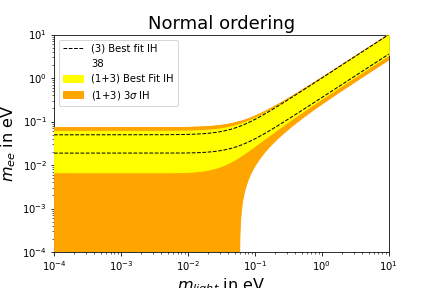

In [10]:
fig2=plt.figure()

def animate2(frame2): 
    
    IHs14=0.023*(frame2/99)
    IHc14=1-IHs14
    
    maxIHs14=0.04*(frame2/99)
    maxIHc14=1-maxIHs14
    
    minIHs14=0.006*(frame2/99)
    minIHc14=1-minIHs14
    
    
    IHmee11=abs(IHc12*IHc13*IHc14*IHm1 + 
                  IHs12*IHc13*IHc14*IHm2*cmath.exp(complex(0,0)) + 
                  IHs13*IHm3*IHc14*cmath.exp(complex(0,0)) + 
                  IHs14*IHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

    IHmee12=abs(IHc12*IHc13*IHc14*IHm1 + 
                  IHs12*IHc13*IHc14*IHm2*cmath.exp(complex(0,numpy.pi)) + 
                  IHs13*IHm3*IHc14*cmath.exp(complex(0,numpy.pi)) + 
                  IHs14*IHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 1,1,1 (in terms of pi)
    
    
    maxIHmee11=abs(minIHc12*minIHc13*minIHc14*maxIHm1 + 
                  maxIHs12*minIHc13*minIHc14*maxIHm2*cmath.exp(complex(0,0)) + 
                  maxIHs13*IHm3*minIHc14*cmath.exp(complex(0,0)) + 
                  maxIHs14*maxIHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

    maxIHmee12=abs(minIHc12*minIHc13*minIHc14*maxIHm1 + 
                  maxIHs12*minIHc13*minIHc14*maxIHm2*cmath.exp(complex(0,numpy.pi)) + 
                  maxIHs13*IHm3*minIHc14*cmath.exp(complex(0,numpy.pi)) + 
                  maxIHs14*maxIHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 1,1,1 (in terms of pi)
    

    minIHmee11=abs(maxIHc12*maxIHc13*maxIHc14*minIHm1 + 
                  minIHs12*maxIHc13*maxIHc14*minIHm2*cmath.exp(complex(0,0)) + 
                  minIHs13*IHm3*maxIHc14*cmath.exp(complex(0,0)) + 
                  minIHs14*minIHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

    minIHmee12=abs(maxIHc12*maxIHc13*maxIHc14*minIHm1 + 
                  minIHs12*maxIHc13*maxIHc14*minIHm2*cmath.exp(complex(0,numpy.pi)) + 
                  minIHs13*IHm3*maxIHc14*cmath.exp(complex(0,numpy.pi)) + 
                  minIHs14*minIHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 1,1,1 (in terms of pi)
    
    plt.cla()
    
    IHmee1=abs(IHc12*IHc13*IHm111 + IHs12*IHc13*IHm222 + IHs13*IHm333)
    IHmee2=abs(IHc12*IHc13*IHm111 - IHs12*IHc13*IHm222 - IHs13*IHm333)

    pylab.plot(IHm333,IHmee1,color="black",label="(3) Best fit IH",linestyle="--",linewidth=1, alpha=1,zorder=14)
    pylab.plot(IHm333,IHmee2,color="black",linestyle="--",linewidth=1, alpha=1,zorder=14)
    
    #pylab.plot(IHm3, IHmee11, color="black", label="(3) Best fit IH", linestyle="--", linewidth=1, alpha=1, zorder=14)
    #pylab.plot(IHm3, IHmee12,color="blue",linestyle="--", linewidth=1, alpha=1,zorder=14)
    
    #pylab.plot(IHm3, maxIHmee11, color="black", label="(3) Best fit IH", linestyle="-", linewidth=1, alpha=1, zorder=14)
    #pylab.plot(IHm3, maxIHmee12,color="blue",linestyle="-", linewidth=1, alpha=1,zorder=14)
    
    pylab.plot(0, 0,color="white",label=frame2)
        
    plt.fill_between(IHm3, IHmee11, IHmee12, color="yellow",label="(1+3) Best Fit IH",alpha=1,zorder=14)
    if frame2>60:
        plt.fill_between(IHm3, IHmee11, 0, where=(IHm3>0.0001)&(IHm3<IHm3[numpy.argmin(IHmee12)]) ,color="yellow",alpha=1,zorder=14)
    
    plt.fill_between(IHm3, maxIHmee11, maxIHmee12, color="orange",label="(1+3) 3$\sigma$ IH", alpha=1,zorder=13)
    if frame2>26:
        plt.fill_between(IHm3, maxIHmee11, 0, where=(IHm3>0.0001)&(IHm3<IHm3[numpy.argmin(maxIHmee12)]) ,color="orange",alpha=1,zorder=13)
        

    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.0001, 10)
    plt.ylim(0.0001, 10)
    plt.title("Normal ordering", fontsize=18)
    pylab.xlabel("$m_{light}$ in eV",fontsize=16)
    pylab.ylabel("$m_{ee}$ in eV",fontsize=16)
    pylab.legend(fontsize=10,loc=2)
    
anim2 = FuncAnimation(fig2, animate2, frames=100, interval=100)

In [9]:
#anim.save("Heavy sterile Neutrino animation NH.gif", matplotlib.animation.PillowWriter(fps=15))

In [11]:
#anim2.save("Heavy sterile Neutrino animation IH.gif", matplotlib.animation.PillowWriter(fps=15))